<a href="https://colab.research.google.com/github/hvy22/Redis-1/blob/master/B%E1%BA%A3n_sao_c%E1%BB%A7a_Colaboratory_ch%C3%A0o_m%E1%BB%ABng_b%E1%BA%A1n!.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Mục mới

In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Reshape
from tensorflow.keras.optimizers import Adam
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.layers import Dropout
from tensorflow.keras.preprocessing.sequence import TimeseriesGenerator
from tensorflow.keras.callbacks import History


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import os
print(os.listdir("/content/drive/MyDrive/"))

['Classroom', 'Colab Notebooks', '0950070024_HUỲNH HỒNG VY_09TMĐT.rar', '.ipynb_checkpoints', 'dynamic_api_call_sequence_per_malware_100_0_306.csv', '5percent_MSSQL.csv', 'APA-DDoS-Dataset.csv', 'archive.zip', 'stores data-set.csv', 'Features data set.csv', 'sales data-set.csv']


In [4]:
data = pd.read_csv("/content/drive/MyDrive/dynamic_api_call_sequence_per_malware_100_0_306.csv")


In [5]:
data.head()


,hash,t_0,t_1,t_2,t_3,t_4,t_5,t_6,t_7,t_8,...,t_91,t_92,t_93,t_94,t_95,t_96,t_97,t_98,t_99,malware
0,071e8c3f8922e186e57548cd4c703a5d,112,274,158,215,274,158,215,298,76,...,71,297,135,171,215,35,208,56,71,1
1,33f8e6d08a6aae939f25a8e0d63dd523,82,208,187,208,172,117,172,117,172,...,81,240,117,71,297,135,171,215,35,1
2,b68abd064e975e1c6d5f25e748663076,16,110,240,117,240,117,240,117,240,...,65,112,123,65,112,123,65,113,112,1
3,72049be7bd30ea61297ea624ae198067,82,208,187,208,172,117,172,117,172,...,208,302,208,302,187,208,302,228,302,1
4,c9b3700a77facf29172f32df6bc77f48,82,240,117,240,117,240,117,240,117,...,209,260,40,209,260,141,260,141,260,1


In [6]:
data1 = data.drop(columns=['hash'],

                 axis=1)
data1 = data1.dropna(how='any')
print(data1.shape)

(43876, 101)


<ipython-input-7-5473c328a5be>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=cnt_pro.index.tolist(), y=cnt_pro.values.tolist(), alpha=0.8, palette=custom_palette)


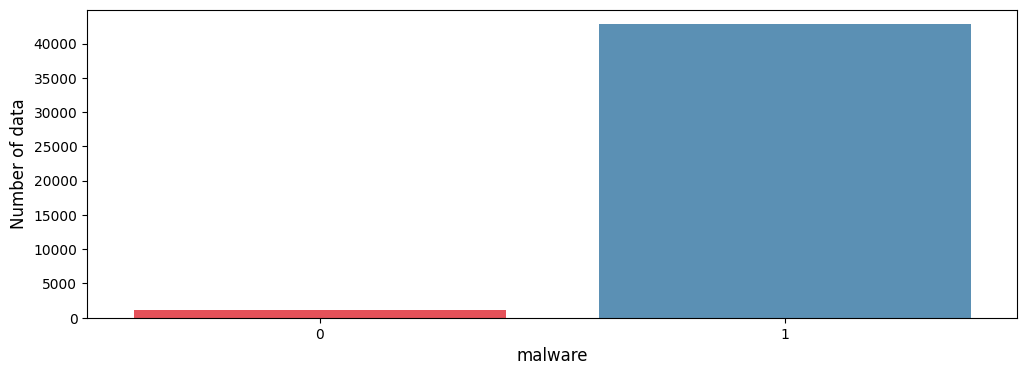

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt
cnt_pro = data1['malware'].value_counts()
custom_palette = ["#fc0814", "#1f77b4"]

plt.figure(figsize=(12, 4))
sns.barplot(x=cnt_pro.index.tolist(), y=cnt_pro.values.tolist(), alpha=0.8, palette=custom_palette)
plt.ylabel('Number of data', fontsize=12)
plt.xlabel('malware', fontsize=12)
plt.show()

In [8]:
from sklearn.model_selection import train_test_split
Y = data1['malware']
X = data1.drop(columns=['malware'])
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=9)


In [9]:
print('X train shape: ', X_train.shape)
print('Y train shape: ', Y_train.shape)
print('X test shape: ', X_test.shape)
print('Y test shape: ', Y_test.shape)


X train shape:  (35100, 100)
Y train shape:  (35100,)
X test shape:  (8776, 100)
Y test shape:  (8776,)


In [10]:
from sklearn.neural_network import MLPClassifier

# We define the model
mlp = MLPClassifier(hidden_layer_sizes=(100,100,100),max_iter=1000, random_state=42)

# We train model
mlp.fit(X_train, Y_train)


# We predict target values
prediction = mlp.predict(X_test)

In [11]:
test_acc_mlp = round(mlp.fit(X_train,Y_train).score(X_test, Y_test)* 100, 2)
train_acc_mlp = round(mlp.fit(X_train, Y_train).score(X_train, Y_train)* 100, 2)

In [12]:
used_data = data.drop(['hash', 'malware'], axis=1)

In [13]:
used_data.head()


,t_0,t_1,t_2,t_3,t_4,t_5,t_6,t_7,t_8,t_9,...,t_90,t_91,t_92,t_93,t_94,t_95,t_96,t_97,t_98,t_99
0,112,274,158,215,274,158,215,298,76,208,...,117,71,297,135,171,215,35,208,56,71
1,82,208,187,208,172,117,172,117,172,117,...,60,81,240,117,71,297,135,171,215,35
2,16,110,240,117,240,117,240,117,240,117,...,123,65,112,123,65,112,123,65,113,112
3,82,208,187,208,172,117,172,117,172,117,...,215,208,302,208,302,187,208,302,228,302
4,82,240,117,240,117,240,117,240,117,172,...,40,209,260,40,209,260,141,260,141,260


In [14]:
unique_api_calls = 307

In [15]:
from keras.models import Sequential
from keras.layers import Embedding, Conv1D, MaxPool1D, LSTM, Dense, BatchNormalization

model = Sequential(name="Cnn-Lstm_model")
model.add(Embedding(input_dim=unique_api_calls, output_dim=8,
                    input_length=X_train.shape[1], name='layer_embedding'))
model.add(BatchNormalization())
model.add(Conv1D(filters=32, kernel_size=9, padding='same', activation='relu'))
model.add(MaxPool1D(pool_size=2))
model.add(LSTM(units=512, return_sequences=False, dropout=0.2))
model.add(Dense(units=1, activation='sigmoid'))


In [16]:
model.summary()


Model: "Cnn-Lstm_model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 layer_embedding (Embedding  (None, 100, 8)            2456      
 )                                                               
                                                                 
 batch_normalization (Batch  (None, 100, 8)            32        
 Normalization)                                                  
                                                                 
 conv1d (Conv1D)             (None, 100, 32)           2336      
                                                                 
 max_pooling1d (MaxPooling1  (None, 50, 32)            0         
 D)                                                              
                                                                 
 lstm (LSTM)                 (None, 512)               1116160   
                                                    

In [17]:
X_train, X_test, y_train, y_test = train_test_split(used_data, data['malware'], test_size=0.25,
                                                    shuffle=True, random_state=42)

In [18]:
X_train.shape

(32907, 100)

In [19]:
unique_api_calls = 307

In [20]:
optimizer = Adam(lr=.0001)
model.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['accuracy'])

In [21]:
history = model.fit(X_train, y_train, validation_split=0.2, epochs=150, batch_size=512)

Epoch 1/150
52/52 [==============================] - 179s 3s/step - loss: 0.1198 - accuracy: 0.9626 - val_loss: 0.5005 - val_accuracy: 0.9771
Epoch 2/150
52/52 [==============================] - 169s 3s/step - loss: 0.0801 - accuracy: 0.9791 - val_loss: 0.5091 - val_accuracy: 0.9790
Epoch 3/150
52/52 [==============================] - 166s 3s/step - loss: 0.0684 - accuracy: 0.9825 - val_loss: 0.2061 - val_accuracy: 0.9761
Epoch 4/150
52/52 [==============================] - 162s 3s/step - loss: 0.0634 - accuracy: 0.9829 - val_loss: 1.6513 - val_accuracy: 0.1727
Epoch 5/150
52/52 [==============================] - 162s 3s/step - loss: 0.0532 - accuracy: 0.9843 - val_loss: 0.1338 - val_accuracy: 0.9678
Epoch 6/150
52/52 [==============================] - 170s 3s/step - loss: 0.0476 - accuracy: 0.9851 - val_loss: 0.3562 - val_accuracy: 0.8507
Epoch 7/150
52/52 [==============================] - 169s 3s/step - loss: 0.0445 - accuracy: 0.9864 - val_loss: 0.3782 - val_accuracy: 0.8388
Epoch 

KeyboardInterrupt: 

In [ ]:
import pandas as pd


malware_df = data[data['malware'] == 1]
benign_df = data[data['malware'] == 0]

malware_df.to_csv('malware_data.csv', index=False)
benign_df.to_csv('benign_data.csv', index=False)

NameError: name 'history' is not defined

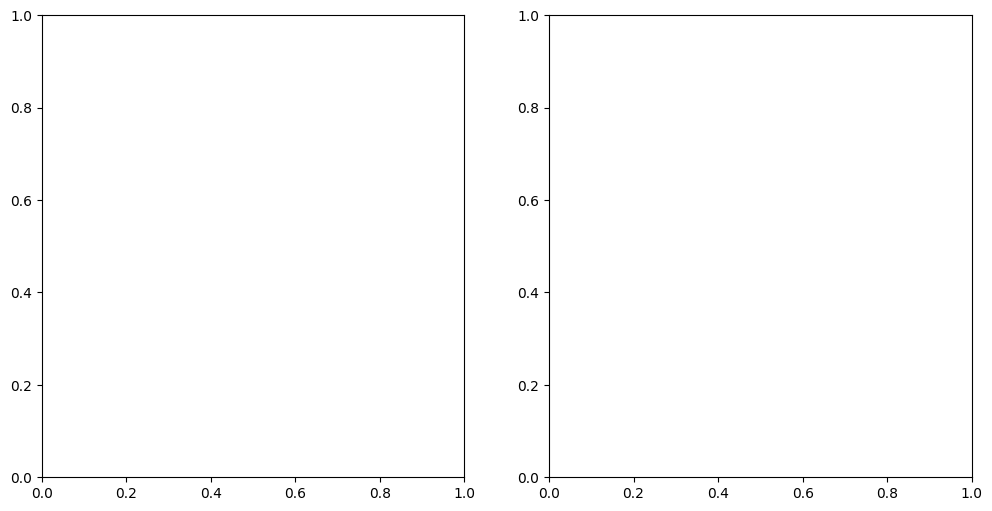

In [ ]:
fig, ax = plt.subplots(1,2, figsize=[12,6])
ax[0].plot(history.history["loss"])
ax[0].plot(history.history["val_loss"])
ax[0].set_title(" Loss")
ax[0].legend(("Training", "validation"), loc="upper right")
ax[0].set_xlabel("Epochs")
ax[1].plot(history.history["accuracy"])
ax[1].plot(history.history["val_accuracy"])
ax[1].legend(("Training", "validation"), loc="lower right")
ax[1].set_title("Accuracy")
ax[1].set_xlabel("Epochs")